# Challenge#5: What's wrong with the output of this k-means clustering? 

## Load libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## A waiter's tip dataset 

In [2]:
df_waiter_tips = pd.read_csv('../data/tips.csv')
df_waiter_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Data pre-processing

In [3]:
df_waiter_tips_processed = df_waiter_tips.copy()

sex_le = LabelEncoder()
smoker_le = LabelEncoder()
time_le = LabelEncoder()
day_oe = OrdinalEncoder(categories=[['Thur', 'Fri', 'Sat', 'Sun']])

df_waiter_tips_processed['sex'] = sex_le.fit_transform(df_waiter_tips_processed['sex'])
df_waiter_tips_processed['smoker'] = smoker_le.fit_transform(df_waiter_tips_processed['smoker'])
df_waiter_tips_processed['time'] = time_le.fit_transform(df_waiter_tips_processed['time'])
df_waiter_tips_processed['day'] = day_oe.fit_transform(df_waiter_tips_processed['day'].values.reshape(-1, 1))

df_waiter_tips_processed

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3.0,0,2
1,10.34,1.66,1,0,3.0,0,3
2,21.01,3.50,1,0,3.0,0,3
3,23.68,3.31,1,0,3.0,0,2
4,24.59,3.61,0,0,3.0,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,2.0,0,3
240,27.18,2.00,0,1,2.0,0,2
241,22.67,2.00,1,1,2.0,0,2
242,17.82,1.75,1,0,2.0,0,2


## Fitting the k-means clustering model 

In [4]:
X_processed = df_waiter_tips_processed.values
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_processed)

KMeans(n_clusters=3)

## Inference 

In [5]:
y_processed = kmeans.predict(X_processed)
df_waiter_tips_processed['prediction'] = y_processed

df_waiter_tips_processed

,total_bill,tip,sex,smoker,day,time,size,prediction
0,16.99,1.01,0,0,3.0,0,2,0
1,10.34,1.66,1,0,3.0,0,3,0
2,21.01,3.50,1,0,3.0,0,3,2
3,23.68,3.31,1,0,3.0,0,2,2
4,24.59,3.61,0,0,3.0,0,4,2
...,...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,2.0,0,3,2
240,27.18,2.00,0,1,2.0,0,2,2
241,22.67,2.00,1,1,2.0,0,2,2
242,17.82,1.75,1,0,2.0,0,2,0


## Evaluating the model 

In [6]:
silhouette_score(X_processed, y_processed)

0.48823014754623983

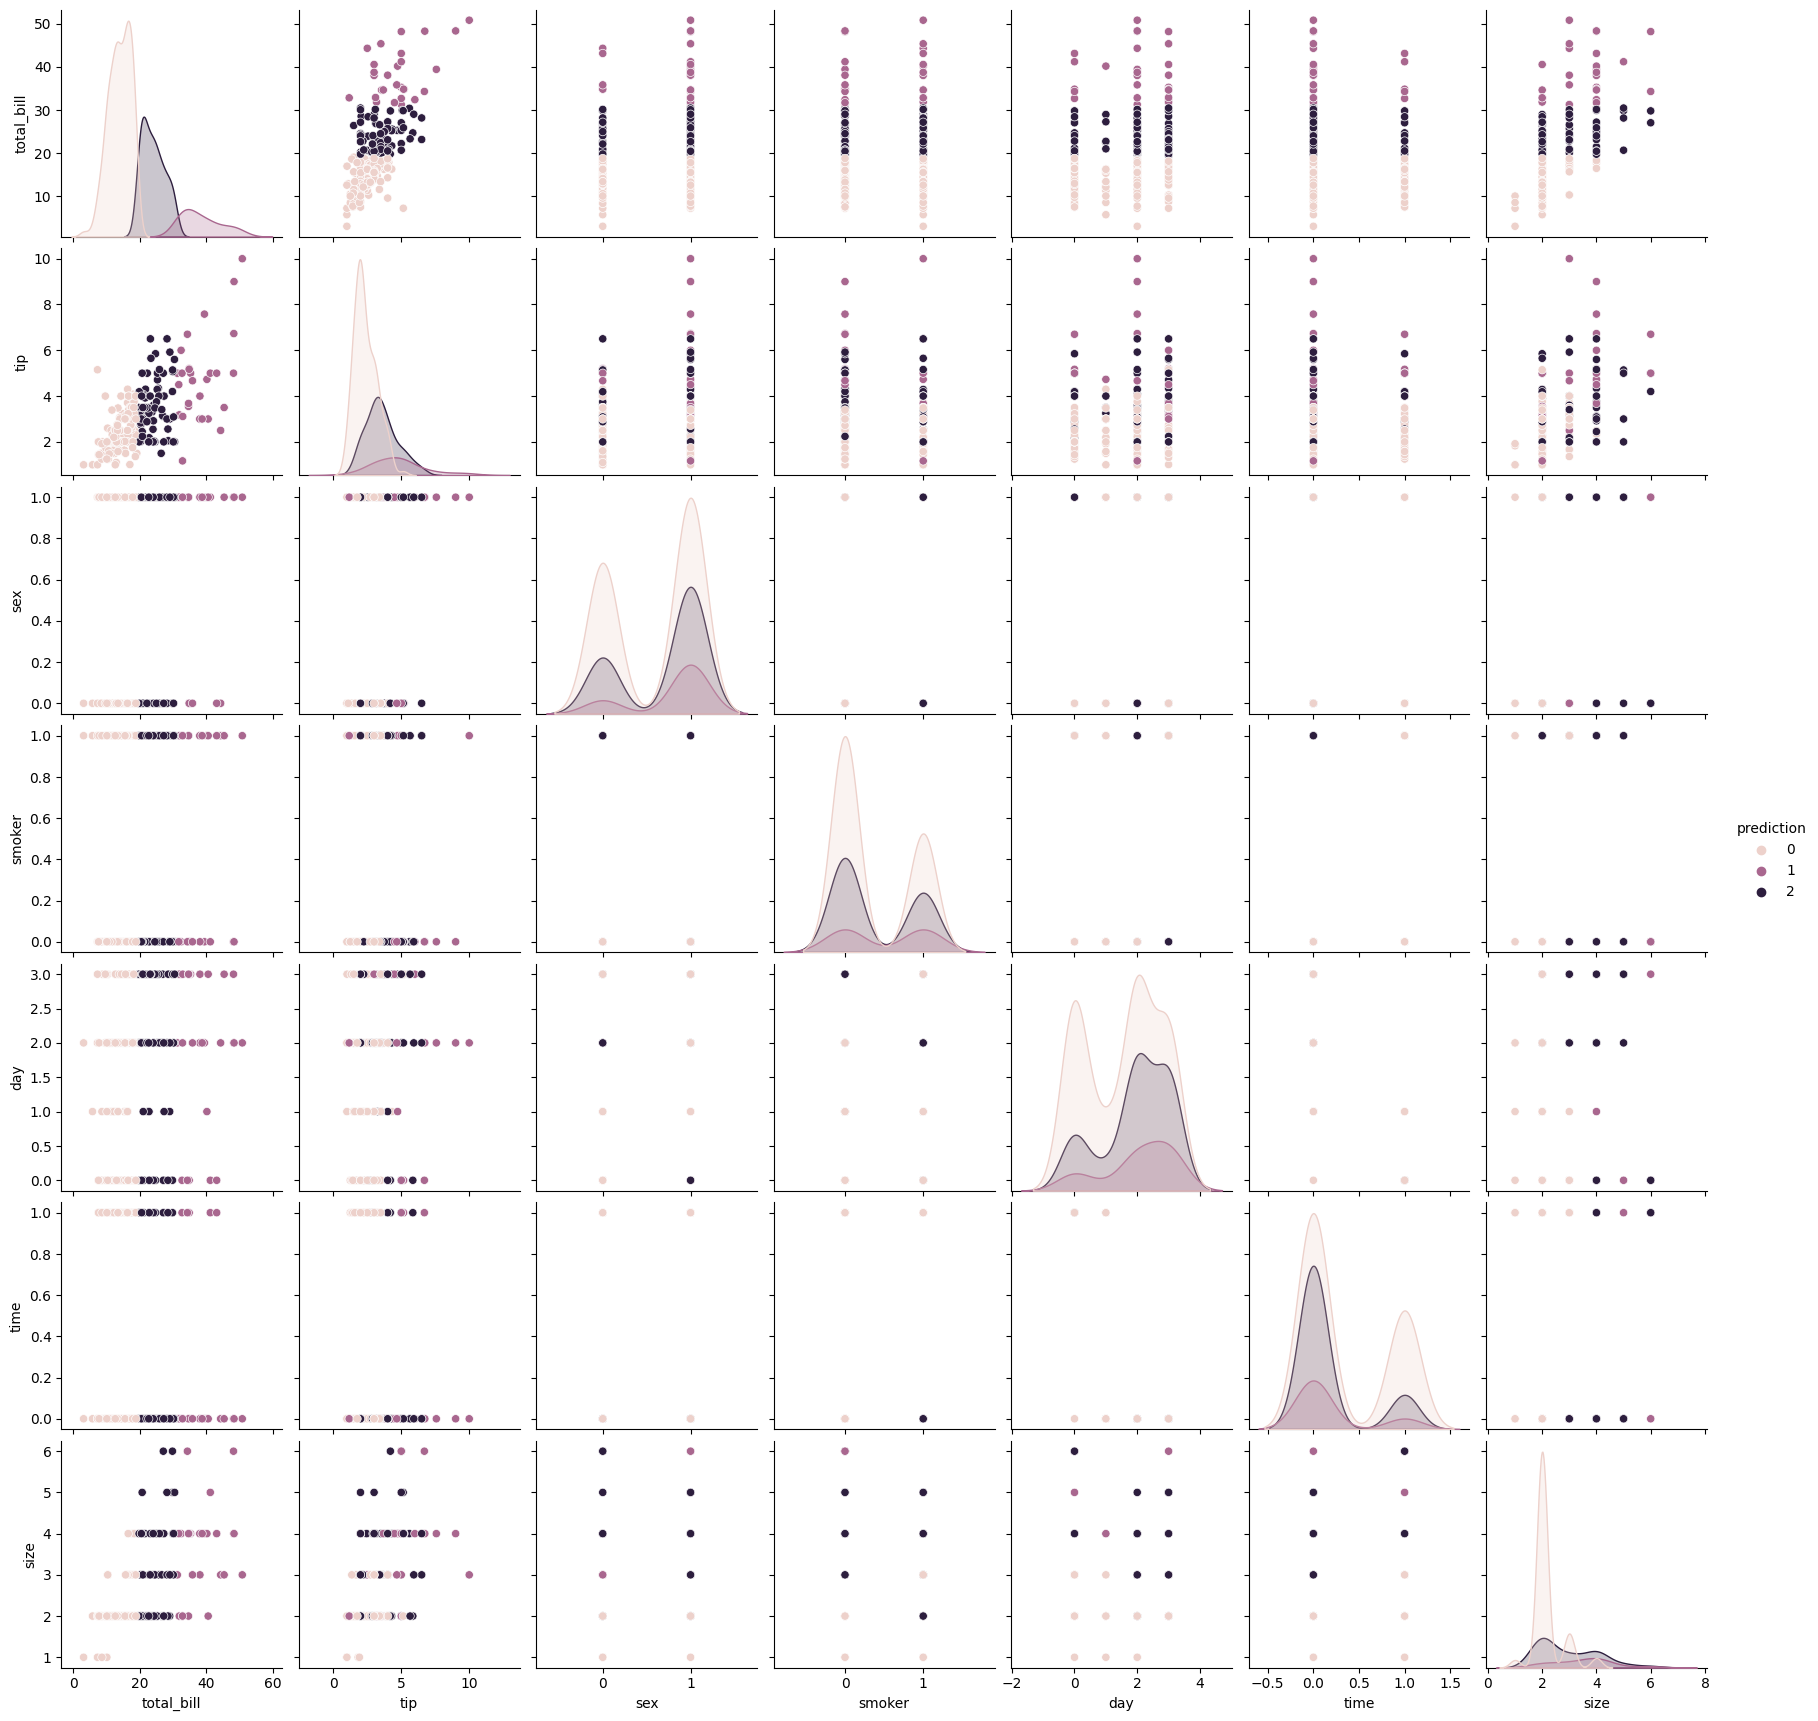

In [7]:
ax = sns.pairplot(df_waiter_tips_processed, hue="prediction")

In [8]:
for i, feature in enumerate(df_waiter_tips_processed.drop(columns='prediction').columns):
    print(feature, silhouette_score(np.delete(X_processed, i, axis=1), y_processed)/silhouette_score(X_processed, y_processed))

total_bill 0.17104080605246724
tip 1.0277403561707197
sex 1.0092725795455146
smoker 1.0092712389329361
day 1.0475373347767538
time 1.0064453162573985
size 1.017313487139892
